In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df_1 = pd.read_csv("train.csv")
df_2 = pd.read_csv("test.csv")
if 'SalePrice' not in df_2.columns:
    df_2["SalePrice"] = 0

df = pd.concat([df_1, df_2], axis=0)
df = df.set_index('Id')

In [13]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,0
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,0
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,0


In [14]:
df.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [15]:
df_null = df[df.isnull().sum()[df.isnull().sum()>0].index]
df_null.head()

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,2003.0,RFn,2.0,548.0,TA,TA,NaN,NaN,NaN,WD
2,RL,80.0,NaN,AllPub,MetalSd,MetalSd,NaN,0.0,Gd,TA,...,1976.0,RFn,2.0,460.0,TA,TA,NaN,NaN,NaN,WD
3,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,2001.0,RFn,2.0,608.0,TA,TA,NaN,NaN,NaN,WD
4,RL,60.0,NaN,AllPub,Wd Sdng,Wd Shng,NaN,0.0,TA,Gd,...,1998.0,Unf,3.0,642.0,TA,TA,NaN,NaN,NaN,WD
5,RL,84.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,...,2000.0,RFn,3.0,836.0,TA,TA,NaN,NaN,NaN,WD


<Axes: ylabel='Id'>

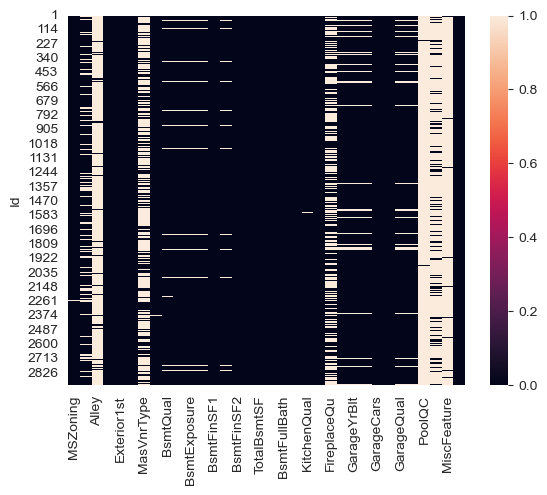

In [16]:
sns.heatmap(df_null.isnull())

In [17]:
df_object = df[df.select_dtypes(include=['object']).columns]

In [18]:
df_object

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
2916,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
2917,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml


In [19]:
sns.heatmap(df_object)

ValueError: could not convert string to float: 'RL'

In [20]:
df = df.drop(df[df_object.isnull().sum()[df_object.isnull().sum()>1100].index], axis = 1)


In [21]:
df_object = df_object.drop(df_object[df_object.isnull().sum()[df_object.isnull().sum()>1100].index], axis = 1)

In [22]:
df_object

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,Y,WD,Normal
2916,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,SBrkr,TA,Typ,CarPort,Unf,TA,TA,Y,WD,Abnorml
2917,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml


In [23]:
for column in df_object.columns:
    mode = df_object[column].mode()[0]
    df_object[column].fillna(mode, inplace = True)

In [24]:
df_object.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [25]:
df_object_encoded = pd.get_dummies(df_object)

In [26]:
df_object_encoded.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3,False,False,False,True,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,True,False
4,False,False,False,True,False,False,True,True,False,False,...,False,False,False,True,True,False,False,False,False,False
5,False,False,False,True,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,True,False


In [27]:
df_new = pd.concat([df, df_object_encoded], axis=1)

In [28]:
df_new.shape

(2919, 304)

In [29]:
df_new.isnull().sum()

MSSubClass                 0
MSZoning                   4
LotFrontage              486
LotArea                    0
Street                     0
                        ... 
SaleCondition_AdjLand      0
SaleCondition_Alloca       0
SaleCondition_Family       0
SaleCondition_Normal       0
SaleCondition_Partial      0
Length: 304, dtype: int64

In [30]:
df_new = df_new.drop(df.select_dtypes(include=['object']), axis = 1)

In [31]:
df_new.shape

(2919, 267)

In [32]:
df_new.isnull().sum()[df_new.isnull().sum()>0]

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

In [33]:
median_columns = [
    'LotFrontage',  # Continuous numeric, robust to outliers
    'MasVnrArea',   # Continuous numeric, masonry area
    'TotalBsmtSF',  # Total basement area
    'GarageYrBlt',  # Year garage was built, year data
    'GarageArea'    # Continuous numeric, garage area
]

mode_columns = [
    'BsmtFullBath',  # Discrete numeric (count of full bathrooms)
    'BsmtHalfBath',  # Discrete numeric (count of half bathrooms)
    'GarageCars'     # Discrete numeric (car capacity in garage)
]

In [34]:
for column in median_columns:
    df_new[column].fillna(df_new[column].median(), inplace=True)
    
for column in mode_columns:
    df_new[column].fillna(df_new[column].mode()[0], inplace=True)

In [35]:
df_new.isnull().sum()[df_new.isnull().sum()>0]

BsmtFinSF1    1
BsmtFinSF2    1
BsmtUnfSF     1
dtype: int64

In [36]:
# Filling the missing values with the median for each column
df_new['BsmtFinSF1'].fillna(df_new['BsmtFinSF1'].median(), inplace=True)
df_new['BsmtFinSF2'].fillna(df_new['BsmtFinSF2'].median(), inplace=True)
df_new['BsmtUnfSF'].fillna(df_new['BsmtUnfSF'].median(), inplace=True)


In [37]:
df_new.isnull().sum()[df_new.isnull().sum()>0]

Series([], dtype: int64)

In [39]:
traning_data = df_new[0:len(df_1)]
testing_data = df_new[len(df_1):]
testing_data = testing_data.drop(columns='SalePrice')

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [41]:
x= traning_data.drop(columns='SalePrice')
y = traning_data['SalePrice']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=40)

In [44]:
y_test = np.reshape(y_test,(-1,1))
y_train = np.reshape(y_train,(-1,1))

In [45]:
y_test.shape

(365, 1)

In [59]:
lr = LinearRegression()
lr.fit(x, y)
y_pred = lr.predict(x_test)
mean_squared_error(y_test, y_pred), lr.score(x_test, y_test)

(383543306.80881447, 0.9228228979818939)

In [60]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.1)
xgb.fit(x, y)
y_pred = xgb.predict(x_test)
mean_squared_error(y_test, y_pred), xgb.score(x_test, y_test)

(2498.565273420778, 0.9999994972353223)

In [61]:
rfr = RandomForestRegressor()
rfr.fit(x, y)
y_pred = rfr.predict(x_test)
mean_squared_error(y_test, y_pred), rfr.score(x_test, y_test)

(80514061.3350989, 0.9837988518760714)

In [57]:
from sklearn.ensemble import VotingRegressor

In [63]:
vr = VotingRegressor(estimators=[('rf', rfr), ('xgb', xgb)])
vr.fit(x, y)
y_pred = vr.predict(x_test)
mean_squared_error(y_test, y_pred), vr.score(x_test, y_test)

(18634689.362150878, 0.9962503026478433)

In [64]:
prd = xgb.predict(testing_data)

final = pd.DataFrame()
final['Id'] = testing_data.index
final['SalePrice'] = prd

final.to_csv('output.csv', index=False)

In [65]:
final

,Id,SalePrice
0,1461,127547.226562
1,1462,156726.890625
2,1463,187729.515625
3,1464,187201.953125
4,1465,197683.562500
...,...,...
1454,2915,76425.976562
1455,2916,78136.078125
1456,2917,154498.734375
1457,2918,111185.695312


In [66]:
param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

In [67]:
from sklearn.model_selection import GridSearchCV